# Machine Learning Foundation
## Support Vector Machine

### Setp up

In [73]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
## import the library and dataset
import warnings
warnings.filterwarnings('ignore')

In [ ]:
os.chdir('data')

In [3]:
filepath='Wine_Quality_Data.csv'
data=pd.read_csv(filepath, sep=',')

In [4]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [48]:
y=(data['color'] == 'red').astype(int)
fields=data.columns[:-1].tolist()

In [12]:
correlations=data[fields].corrwith(y)

In [13]:
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [14]:
sns.set_context('talk')
sns.set_style('white')

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


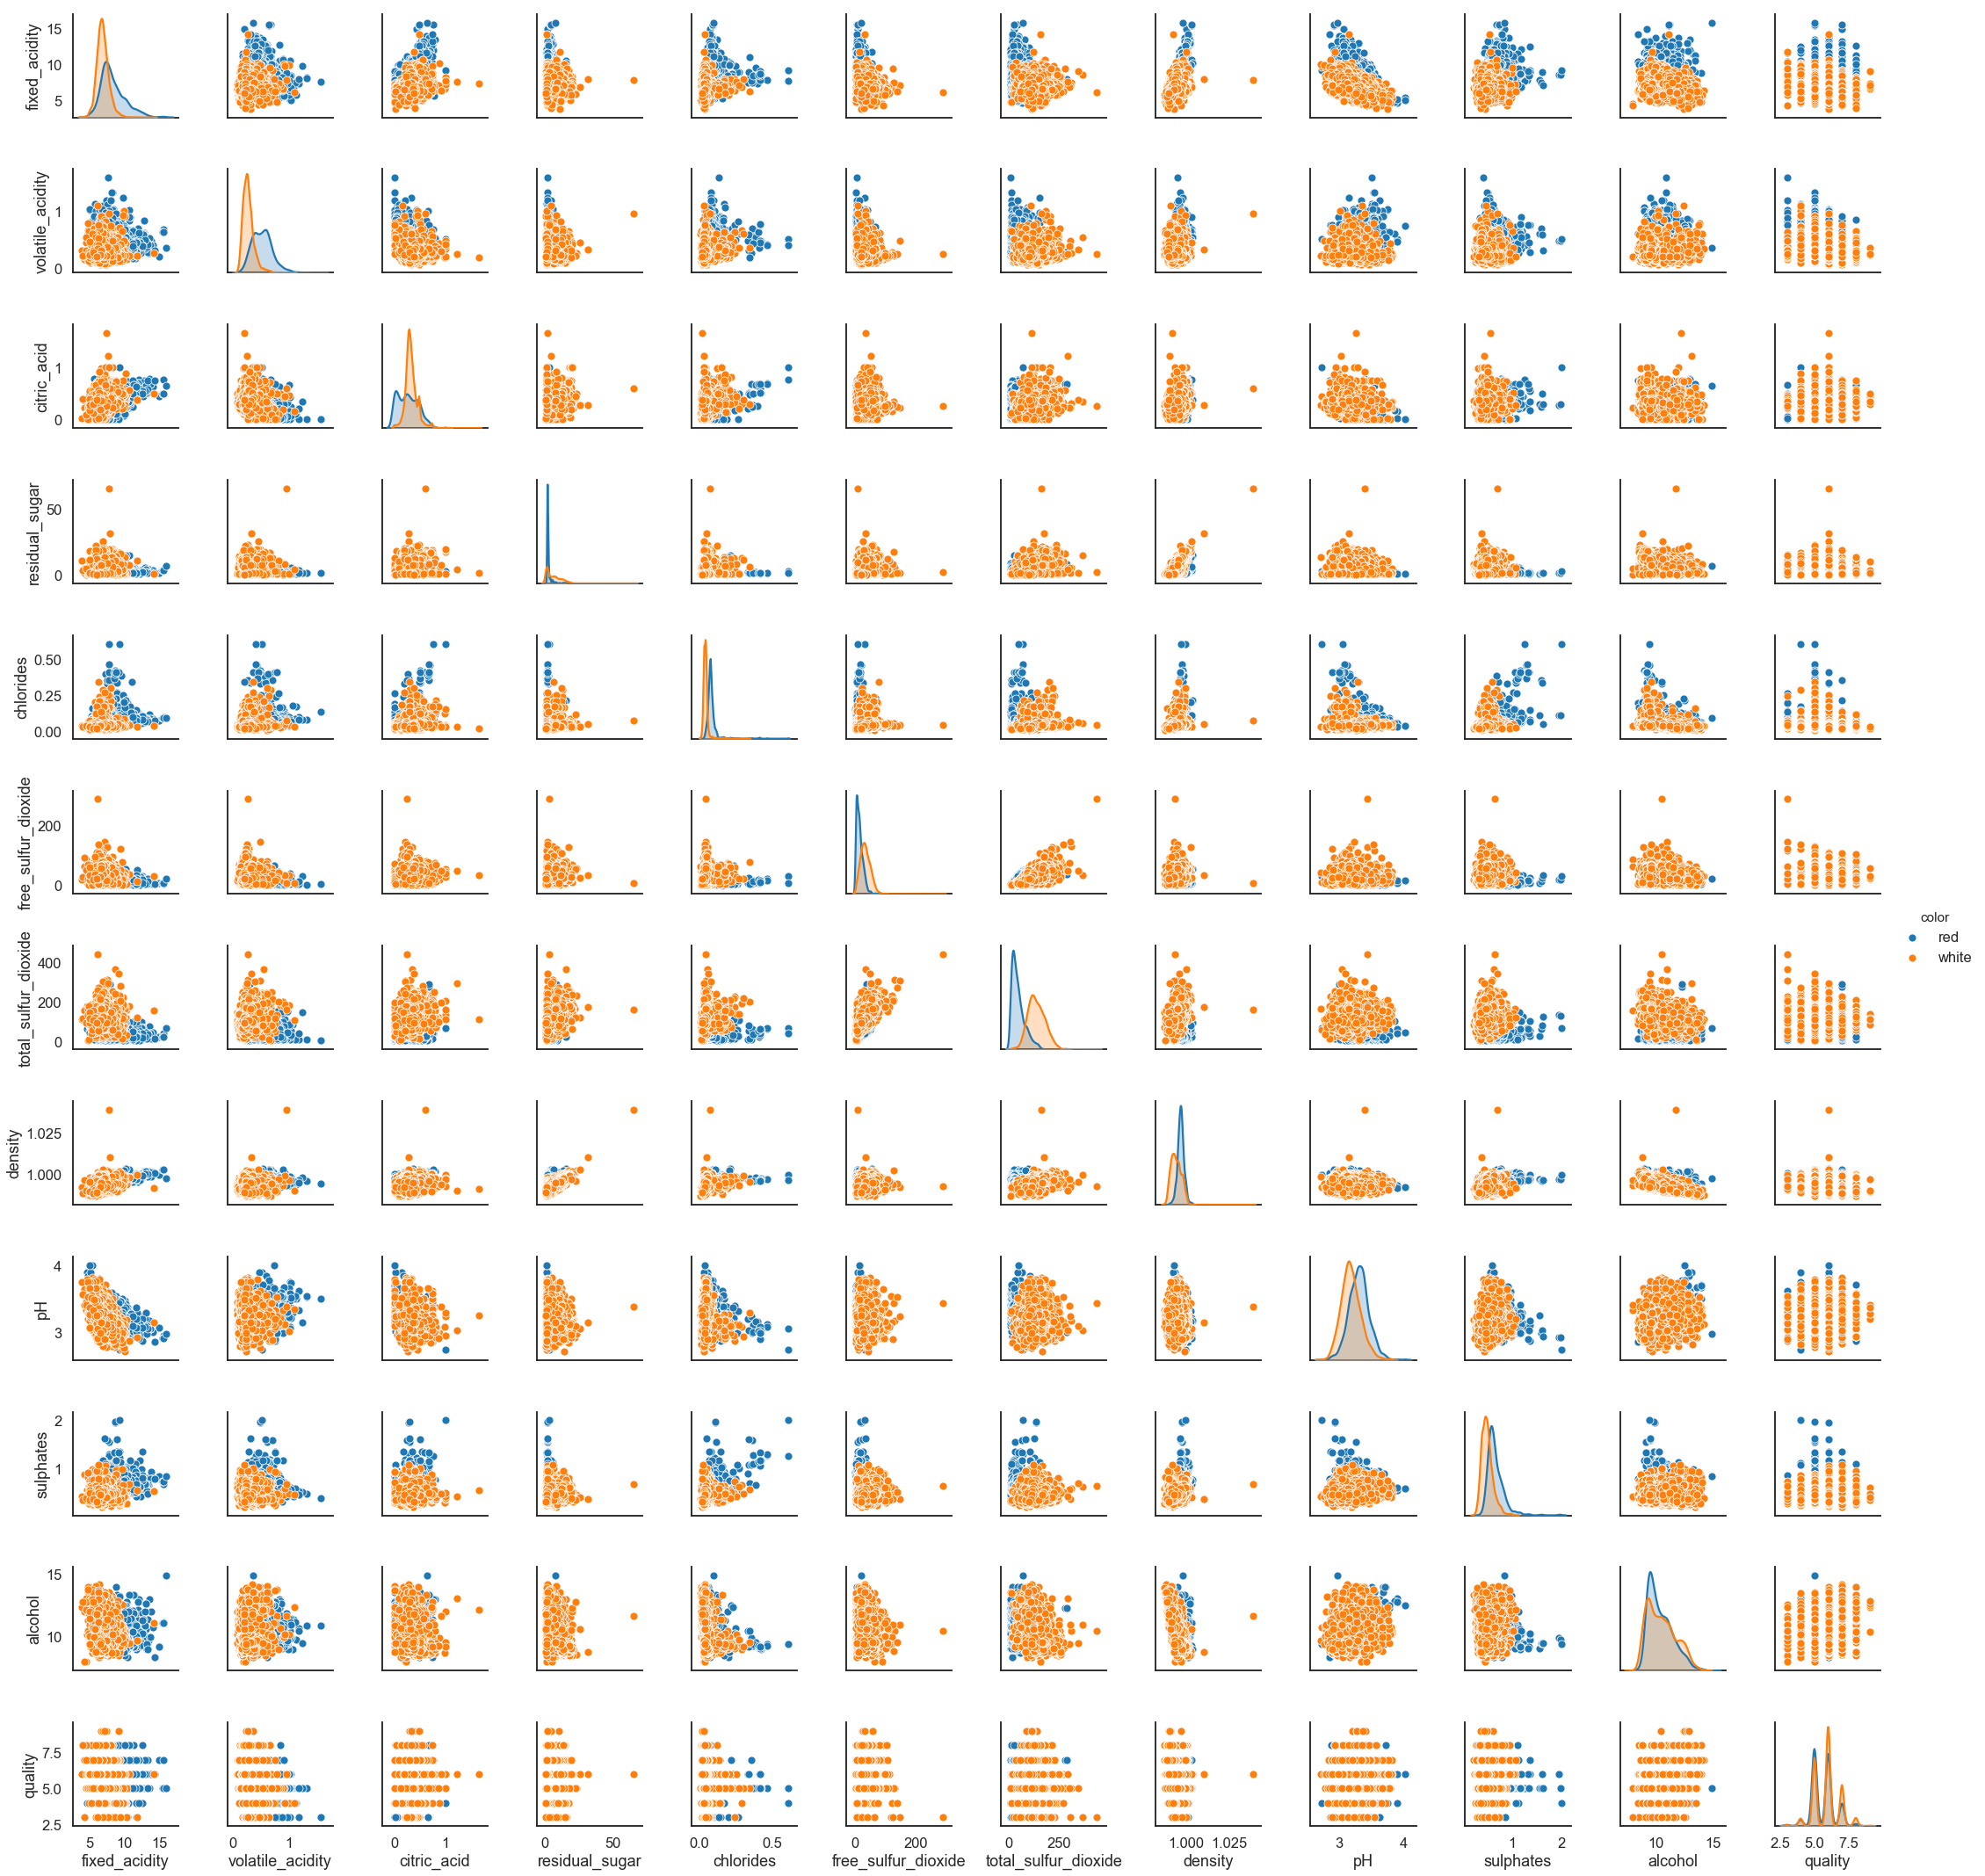

In [18]:
sns.pairplot(data, hue='color')

[(-1, 1), Text(0, 0.5, 'pearson correction')]

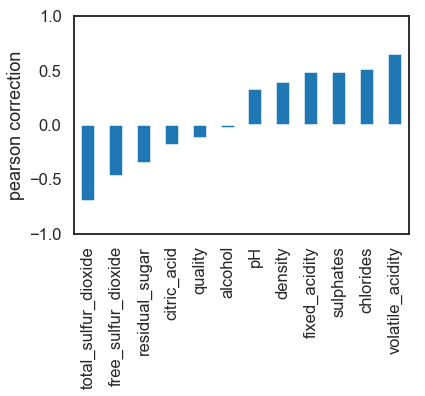

In [19]:
ax=correlations.plot(kind='bar')
ax.set(ylim=[-1,1], ylabel='pearson correction')

In [49]:
from sklearn.preprocessing import MinMaxScaler

fields=correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X=data[fields]
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


### Linear Decision Boundary 

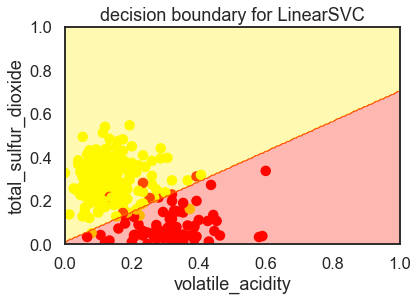

In [34]:
from sklearn.svm import LinearSVC
LSVC=LinearSVC()
LSVC.fit(X,y)

X_color=X.sample(300, random_state=45)
y_color=y.loc[X_color.index]
y_color=y_color.map(lambda r: 'red' if r==1 else 'yellow')
ax=plt.axes()

ax.scatter(
X_color.iloc[:,0], X_color.iloc[:,1],
color=y_color, alpha=1)

# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');


### Gausian Kernal

In [66]:
color_code=['yellow', 'red']
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X,y)
    X_color=X.sample(300)
    y_color=y.loc[X_color.index]
    y_color=[color_code[i] for i in y_color]
    #y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

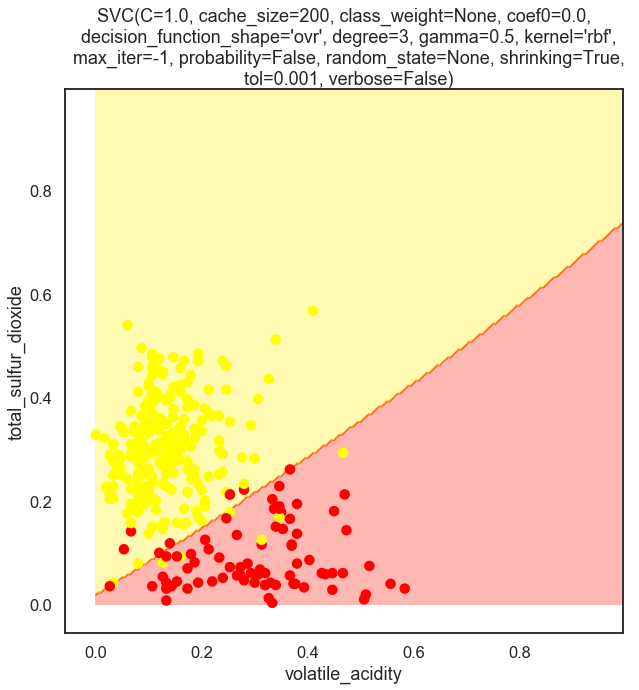

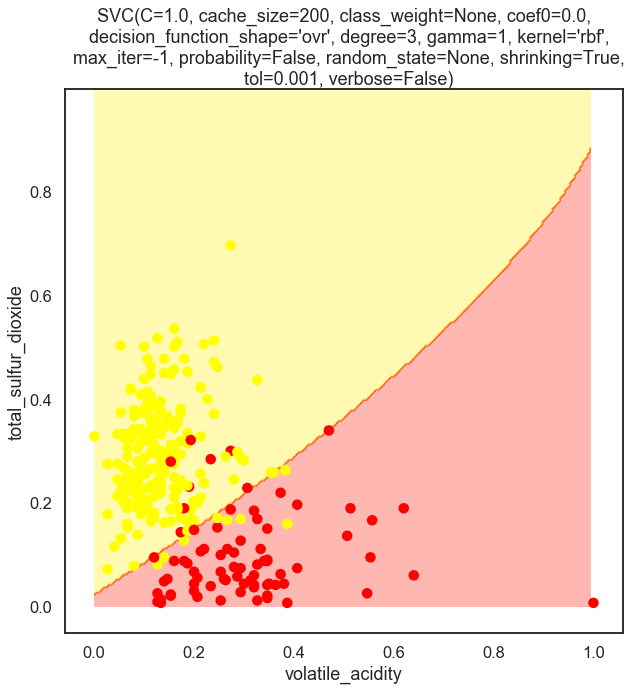

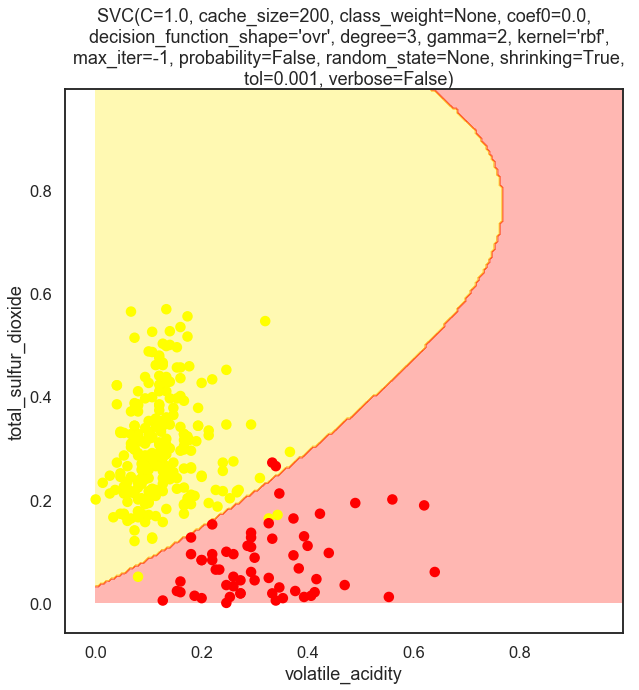

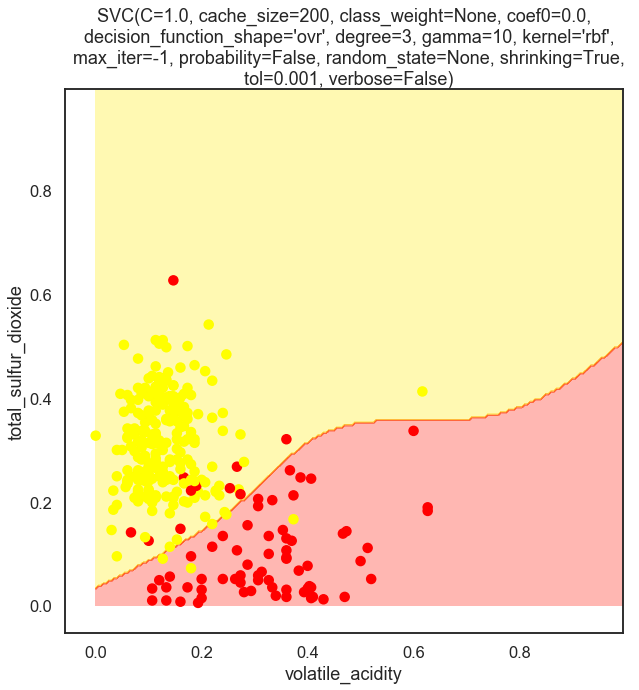

In [67]:
from sklearn.svm import SVC
gammas=[.5, 1, 2, 10]
for gamma in gammas:
    SVC_gaussian=SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_gaussian, X, y)

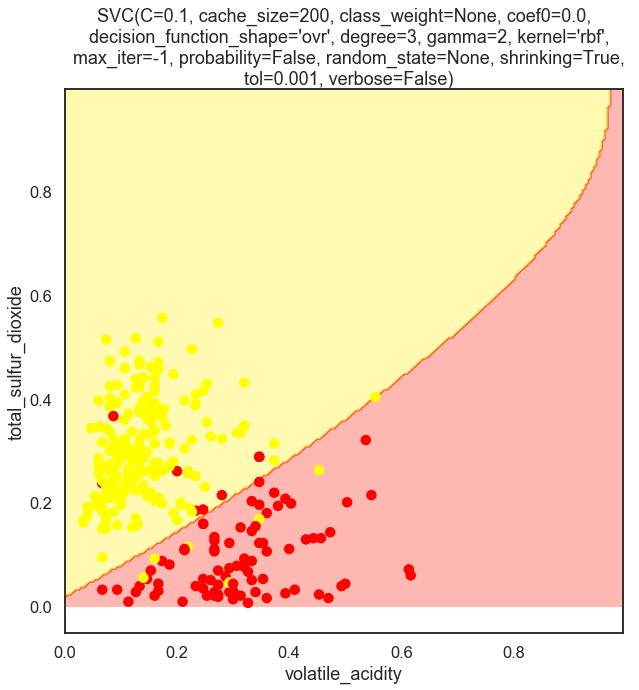

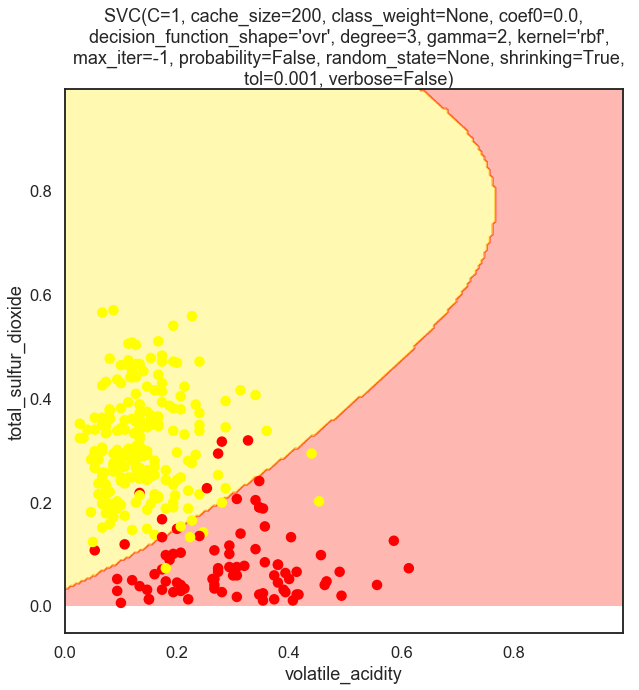

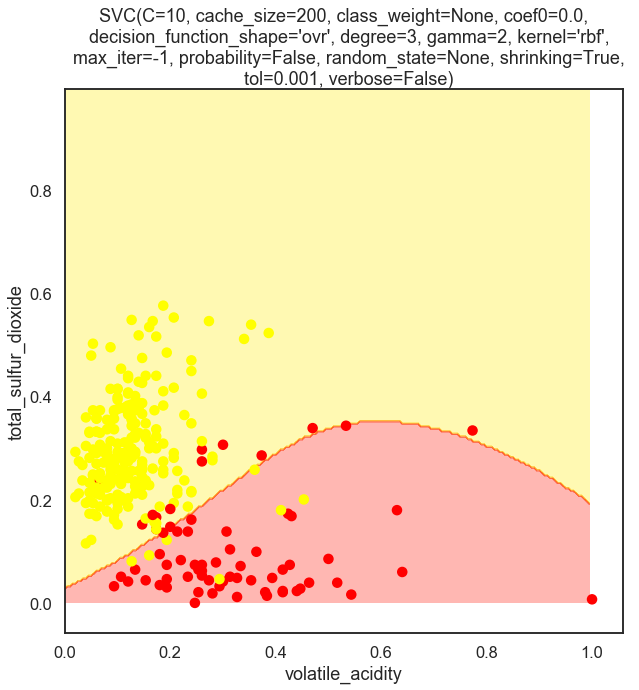

In [68]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

### Compare kernal Execution Times

In [71]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y=data.color=='red'
X=data[data.columns[:-1]]

kwargs={'kernel':'rbf'}
svc=SVC(**kwargs)
nystroem=Nystroem(**kwargs)
sgd=SGDClassifier()

In [77]:
%%timeit
svc.fit(X, y)

1.38 s ± 2.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [78]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

62.7 ms ± 6.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [79]:
%timeit svc.fit(X2, y2)

23.7 s ± 308 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

297 ms ± 9.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
